In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/original-2017-nyc-yellow-taxi-data-raw-version/2017_Yellow_Taxi_Trip_Data.csv
/kaggle/input/cleaned-2017-nyc-yellow-taxi-data-processed/cleaned_2017_Yellow_Taxi_Trip_Data.csv


### <h1 style="color: #272f33;"><strong>Data Analytics Capstone Project: NYC Taxi Fare Prediction</strong></h1>
<font color="#adbac0">Capstone Project – Google Advanced Data Analytics Certificate (Python Case Study: Automatidata)</font><br>
<font style="color: #272f33;">by Vesna Marija Brekalo</font><br>
<i><font color="#adbac0">May, 15 2025</font></i>

<p>&nbsp;</p>
<i><font color="#adbac0"><strong>Disclaimer:</strong> The story, all names, characters, and events presented in this project are fictional. No identification with actual persons (living or deceased) is intended or should be inferred. The data used in this project, as well as the dataset itself, were created for educational purposes and may not reflect the real-world behaviour of taxi drivers in New York City.</font></i>

# <font color="#adbac0"><strong>FOREWORD</strong></font>
This project was completed as part of the **Google Advanced Data Analytics Certificate**. The case study focuses on fare prediction using taxi trip data collected by the **New York City Taxi** and **Limousine Commission (TLC)**. Acting as a data analyst at **Automatidata**, I applied the PACE strategy (Plan, Analyse, Construct, Execute) to clean, assess, and prepare the 2017 Yellow Taxi Trip dataset for future regression modelling and stakeholder reporting.

> **Table of Contents:**
> 
> **INTRODUCTION**   
> **PLAN**  
> **ANALYZE**  
> **VISUALISATION**  
> **CONSTRUCT**  
> **EXECUTE**  
> **MODEL**  
> **CONCLUSION**    

# <font color="#adbac0"><strong>INTRODUCTION</strong></font>

## <strong>Scenario</strong>
Automatidata is a data solutions firm that specialises in transforming raw or underutilised data into practical, data-driven solutions. These include performance dashboards, operational tools, and strategic business insights.

In this case study, Automatidata partnered with the **New York City Taxi** and **Limousine Commission (TLC)** which is the agency responsible for licensing and regulating all taxis and for-hire vehicles in New York City. The TLC engaged Automatidata to develop a regression model capable of estimating the total fare of a taxi ride before the journey begins, using historical trip data.

This predictive capability has the potential to support fare estimation tools, enhance internal cost models, and inform operational planning.

## <strong>Dataset overview</strong>
- **Dataset:** `2017_Yellow_Taxi_Trip_Data.csv`
- **Size:** 408,294 rides
- **Variables:** 18 in total – including timestamps, distances, fare and tip amounts, location IDs, and payment types
- **Purpose:** Predict taxi fares, detect data quality issues, and prepare a clean dataset for future modelling
    
| No. | Column name              | Description                                                               | 
|----:|:-------------------------|:--------------------------------------------------------------------------|
|  1  | ID                       | Trip identification number                                                |
|  2  | VendorID                 | A code indicating the TPEP provider that provided the record.             |
|     |                          | 1 = Creative Mobile Technologies, LLC                                     |
|     |                          | 2 = VeriFone Inc.                                                         |
|  3  | tpep_pickup_datetime     | The date and time when the meter was engaged.                             |
|  4  | tpep_dropoff_datetime    | The date and time when the meter was disengaged.                          |
|  5  | Passenger_count          | The number of passengers in the vehicle.                                  |
|     |                          | This is a driver-entered value.                                           |
|  6  | Trip_distance            | The elapsed trip distance in miles reported by the taximeter.             |
|  7  | PULocationID             | TLC Taxi Zone in which the taximeter was engaged.                         |
|  8  | DOLocationID             | TLC Taxi Zone in which the taximeter was disengaged.                      |
|  9  | RateCodeID               | The final rate code in effect at the end of the trip.                     |
|     |                          | 1 = Standard rate                                                         |
|     |                          | 2 = JFK                                                                   |
|     |                          | 3 = Newark                                                                |
|     |                          | 4 = Nassau or Westchester                                                 |
|     |                          | 5 = Negotiated fare                                                       |
|     |                          | 6 = Group ride                                                            |
| 10  | Store_and_fwd_flag       | Whether the trip record was stored in memory before being sent to vendor. |
|     |                          | Y = Store and forward trip                                                |
|     |                          | N = Not a store and forward trip                                          |
| 11  | Payment_type             | A numeric code for how the passenger paid.                                |
|     |                          | 1 = Credit card                                                           |
|     |                          | 2 = Cash                                                                  |
|     |                          | 3 = No charge                                                             |
|     |                          | 4 = Dispute                                                               |
|     |                          | 5 = Unknown                                                               |
|     |                          | 6 = Voided trip                                                           |
| 12  | Fare_amount              | The time-and-distance fare calculated by the meter.                       |
| 13  | Extra                    | Miscellaneous extras and surcharges (e.g., rush hour fees).               |
| 14  | MTA_tax                  | \\$0.50 MTA tax automatically triggered based on the metered rate.        |
| 15  | Improvement_surcharge    | \\$0.30 surcharge applied at the flag drop since 2015.                    |
| 16  | Tip_amount               | Tip amount (credit card only). Cash tips not included.                    |
| 17  | Tolls_amount             | Total amount of all tolls paid during the trip.                           |
| 18  | Total_amount             | The total charged to passengers (excluding cash tips).                    |
    
### Team Members
**Automatidata**
- Udo Bankole – Director of Data Analysis
- Deshawn Washington – Data Analysis Lead
- Luana Rodriquez – Senior Data Analyst
- Uli King – Project Manager

**NYC TLC**
- Juliana Soto – Head of Finance
- Titus Nelson – Head of Operations

# <font color="#adbac0"><strong>PLAN</strong></font>

## Understanding the Situation
Before beginning the coding phase, I reviewed the dataset structure using methods such as `df.info()` and `df.head()`. These initial inspections provided a foundational understanding of the data layout, variable types, and any immediately visible anomalies.

To interpret the context and relevance of each column, I consulted the official data dictionary and supporting documentation. Based on this review, I drafted an initial plan to:

- Identify missing values
- Detect and investigate potential outliers
- Classify variables by type (numerical, categorical, datetime)
- Anticipate possible data quality issues (e.g. manual entry errors)
- Determine which variables would require transformation or encoding

To support best practices during the data preparation phase, I referred to the following resources:
- Python notebook examples from the Google Advanced Data Analytics Certificate
- Official Pandas and NumPy documentation
- Course-provided materials and codebooks

Before implementing any code, I also revisited the **business objective**, which was to predict total taxi fares, and considered logical relationships within the data. For example, fare amounts typically increase with distance or duration. I further explored the potential for **external data enrichment**, such as weather conditions or public holidays, and flagged relevant variables for future feature engineering.

## Business Goal
> Build a model to predict total fare amount for a yellow taxi ride in New York City, using trip-related data (e.g., distance, duration, timestamps, passenger count).

## Analytical Objectives
> - Understand and clean the 2017 trip data.
> - Identify relevant features for predictive modeling.
> - Spot and remove invalid or anomalous records (e.g., 0 fare, 100+ mile trips).
> - Create new features to improve prediction accuracy (e.g., trip duration).

## Key Stakeholders
> - Data science and analysis teams at Automatidata
> - Finance and operations departments at NYC TLC
> - Potentially end-users via fare estimation tools

# <font color="#adbac0"><strong>ANALYZE</strong></font>

## Initial Data Exploration
Before performing any transformations or cleaning steps, I began by loading the dataset and conducting a structural review. Using commands such as `df.info()`, `df.head()`, and `df.describe()`, I gained an initial understanding of the data types, distributions, and potential issues.

This preliminary analysis helped inform a plan for identifying outliers, missing values, and invalid records, particularly in key fields such as `trip_distance`, `fare_amount`, and `trip_duration`.

## Data Import & Exploration

In [2]:
# Import libraries for data analysis
import pandas as pd               # library for working with dataframes
import numpy as np                # for numerical operations
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Load dataset into dataframe with expanded null value detection
df = pd.read_csv(
    '/kaggle/input/original-2017-nyc-yellow-taxi-data-raw-version/2017_Yellow_Taxi_Trip_Data.csv',
    na_values=["", " ", "NA", "N/A", "null", "NULL"]
)

print("Dataset successfully loaded.")

Dataset successfully loaded.


## Overview of basic information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [5]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [6]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


**Key Observations:**
- Most columns are numeric; some are categorical (`VendorID`, `RateCodeID`, `payment_type`)
- Missing values exist in datetime and tip columns
- Outliers detected in `trip_distance`, `fare_amount`, and `total_amount`

In [7]:
# Save the number of rows before cleaning
rows_before = len(df)

## <strong>Data Cleaning</strong>

In [8]:
# Conversion of the tpep_pickup_datetime column to the correct datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Convert tpep_dropoff_datetime column to datetime
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Check data types of tpep_pickup_datetime and tpep_dropoff_datetime columns
df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].dtypes 

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
dtype: object

This confirms whether both datetime columns were successfully converted from string to datetime format.

In [9]:
print(df.columns)

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')


In [10]:
# Calculate trip duration in minutes
df['trip_duration_min'] = (
    df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

Created a new column, `trip_duration_min`, by calculating the difference between the `tpep_dropoff_datetime` and `tpep_pickup_datetime` times, and then converting the result from seconds to minutes.

In [11]:
# Checking columns really changed
df.dtypes                                    

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
trip_duration_min               float64
dtype: object

In [12]:
# Returns True if the column exists
'trip_duration_min' in df.columns        

True

In [13]:
# Check the actual values in the column
df[['trip_duration_min']].head(10)         

,trip_duration_min
0,14.066667
1,26.500000
2,7.200000
3,30.250000
4,16.716667
5,8.000000
6,59.633333
7,21.983333
8,12.116667
9,20.433333


In [14]:
# Check the column type and statistics
df['trip_duration_min'].describe()      

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: trip_duration_min, dtype: float64

### Clean data by removing invalid or extreme values

Removed rows with invalid or illogical values in key numerical columns such as fare, duration, distance, tips, and passenger count. This step helps ensure that the data used for modelling is accurate and reliable.

In [15]:
# Save number of rows before cleaning
rows_before = len(df)

# Start cleaning
# Filter out trips with invalid fare amounts
df = df[df['fare_amount'] > 0]

# Remove negative total charges
df = df[df['total_amount'] >= 0]

# Remove trips with unrealistic trip distances
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 100)]

# Remove trips with non-positive trip durations
df = df[df['trip_duration_min'] > 0]

# Remove trips with unlikely passenger counts
df = df[df['passenger_count'] <= 6]

# Remove rows with negative tip values (not realistic) 
df = df[df['tip_amount'] >= 0]

# Remove rows with negative toll amounts (invalid values)
df = df[df['tolls_amount'] >= 0]

# Save the number of rows remaining after data cleaning
rows_after = len(df)

**Issues identified and removed:**
- `fare_amount <= 0`: Invalid or free trips
- `total_amount < 0`: Negative total charges are not logically possible
- `trip_distance > 100 or <= 0`: Likely incorrect or extreme outliers
- `trip_duration_min <= 0`: Dropoff time is before or equal to pickup time
- `passenger_count > 6`: Highly unlikely for a regular NYC taxi
- `tip_amount < 0`: Negative tips are not possible and likely data entry errors
- `tolls_amount < 0`: Negative tolls are invalid and should be removed
- The column `Unnamed: 0` was removed, likely a leftover from the `index_col` parameter during CSV import.

### **Data Cleaning Summary**

In [16]:
# Display the number of rows removed during data cleaning

print(f"Rows before cleaning: {rows_before}")
print(f"Rows after cleaning: {rows_after}")
print(f"Rows removed: {rows_before - rows_after}")

Rows before cleaning: 22699
Rows after cleaning: 22534
Rows removed: 165


- **Rows before cleaning:** 22,699  
- **Rows after cleaning:** 22,534  
- **Total rows removed:** 165  

A total of 165 rows were removed due to invalid or illogical values in key columns such as `fare_amount`, `total_amount`, `trip_distance`, `trip_duration_min`, `passenger_count`, `tip_amount`, and `tolls_amount`.

In particular, some entries in `trip_distance` exceeded 100 miles, which is extremely unusual for an urban taxi service. These values are likely outliers that could distort average metrics and negatively impact the performance of a predictive model.

In [17]:
# Load cleaned dataset into dataframe
df = pd.read_csv(
    '/kaggle/input/cleaned-2017-nyc-yellow-taxi-data-processed/cleaned_2017_Yellow_Taxi_Trip_Data.csv')

print("Cleaned dataset successfully loaded.")

Cleaned dataset successfully loaded.


## <strong>Exploratory Findings (Detailed Analysis of Variables)</strong>
### Trip Distance Analysis – `trip_distance`

In [18]:
# Sort the data by trip_distance from maximum to minimum value

df_sort = df.sort_values(by=['trip_distance'],ascending=False)
df_sort.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
18130,1,10/26/2017 2:45:01 PM,10/26/2017 4:12:49 PM,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31
5792,2,08/11/2017 2:14:01 PM,08/11/2017 3:17:31 PM,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20
15350,2,09/14/2017 1:44:44 PM,09/14/2017 2:34:29 PM,1,28.23,2,N,13,132,1,52.00,0.0,0.5,4.40,5.76,0.3,62.96
10302,1,05/15/2017 8:11:34 AM,05/15/2017 9:03:16 AM,1,28.20,2,N,90,132,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27
2592,2,06/16/2017 6:51:20 PM,06/16/2017 7:41:42 PM,1,27.97,2,N,261,132,2,52.00,4.5,0.5,0.00,5.76,0.3,63.06


### Total Fare Amount Analysis – `total_amount`

In [19]:
# Sort the entire DataFrame by total_amount in descending order
df.sort_values(by ='total_amount', ascending=False).head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8476,1,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29
20312,2,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
13861,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
12511,2,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
15474,2,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80
6064,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
16379,2,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06
3582,1,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,1,7.30,5,N,1,1,1,152.00,0.0,0.0,0.00,0.00,0.3,152.30
11269,1,06/19/2017 12:51:17 AM,06/19/2017 12:52:12 AM,2,0.00,5,N,265,265,1,120.00,0.0,0.0,20.00,11.52,0.3,151.82
9280,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30


In [20]:
# Sort the data by total amount and print the top 10 values

total_amount_sorted = df.sort_values(
    ['total_amount'], ascending=False)['total_amount']
total_amount_sorted.head(10)

8476     1200.29
20312     450.30
13861     258.21
12511     233.74
15474     211.80
6064      179.06
16379     157.06
3582      152.30
11269     151.82
9280      150.30
Name: total_amount, dtype: float64

In [21]:
# Sort the data by total amount and print the bottom 10 values
total_amount_sorted.tail(10)

5448      -4.3
4423      -4.3
10281     -4.3
8204      -4.8
20317     -4.8
11204     -5.3
14714     -5.3
17602     -5.8
20698     -5.8
12944   -120.3
Name: total_amount, dtype: float64

**Key Observations:**

**Very high** total amounts often include **extras** such as surcharges, tolls, and tips. However, a **few stand** out as **unusually high**, sometimes several hundred dollars for a single trip. This could indicate data entry errors or special circumstances, such as long-distance trips outside the city.

### Payment Method Analysis – `payment_type`

In [22]:
# How many of each payment type are represented in the data?

df['payment_type'].value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

Used `value_counts(`) to examine how many trips were associated with each payment type:

- **Code 1 (Credit card):** 15,265 trips  
- **Code 2 (Cash):** 7,267 trips  
- **Code 3 (No charge):** 121 trips  
- **Code 4 (Dispute):** 46 trips

**Key Observations:**

The majority of rides were paid for using either credit card or cash. It is important to note that **tips are only recorded for credit card transactions**, as cash tips are not entered into the system. As a result, `tip_amount` values for cash payments are typically zero and **cannot be reliably used to analyse tipping behaviour**.

In [23]:
# Filter the data for credit card payments only

credit_card = df[df['payment_type']==1]
credit_card.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
5,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36
6,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.00,0.3,59.16
7,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.00,0.3,19.58
9,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.00,0.3,16.55
10,2,03/04/2017 11:58:00 AM,03/04/2017 12:13:12 PM,1,1.77,1,N,162,142,1,11.5,0.0,0.5,2.46,0.00,0.3,14.76
11,2,03/05/2017 7:15:30 PM,03/05/2017 7:52:18 PM,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92


Created a filtered dataset called `credit_card`, which includes **only trips paid by credit card**. This subset allows for more accurate analysis of tipping behaviour.

In [24]:
# Display the number of rows (credit card transactions)
print(f"Number of credit card transactions: {len(credit_card)}")

Number of credit card transactions: 15265


In [25]:
# Display basic information about the credit card dataset
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               15265 non-null  int64  
 1   tpep_pickup_datetime   15265 non-null  object 
 2   tpep_dropoff_datetime  15265 non-null  object 
 3   passenger_count        15265 non-null  int64  
 4   trip_distance          15265 non-null  float64
 5   RatecodeID             15265 non-null  int64  
 6   store_and_fwd_flag     15265 non-null  object 
 7   PULocationID           15265 non-null  int64  
 8   DOLocationID           15265 non-null  int64  
 9   payment_type           15265 non-null  int64  
 10  fare_amount            15265 non-null  float64
 11  extra                  15265 non-null  float64
 12  mta_tax                15265 non-null  float64
 13  tip_amount             15265 non-null  float64
 14  tolls_amount           15265 non-null  float64
 15  improve

### Tip Analysis by Payment Method (Credit Card vs Cash)

In [26]:
# What is the average tip for trips paid for with credit card?

avg_cc_tip = df[df['payment_type']==1]['tip_amount'].mean()
print('Average tip for trips paid by credit card:', avg_cc_tip)

Average tip for trips paid by credit card: 2.7298001965280054


In [27]:
# What is the average tip for trips paid for with cash?

avg_cash_tip = df[df['payment_type']==2]['tip_amount'].mean()
print('Average tip for trips paid by cash::', avg_cash_tip)

Average tip for trips paid by cash:: 0.0


**Key Observations:**

Calculated the average tip amount for both credit card and cash payments.
As expected, **tips** are **only recorded** for **credit card** transactions. The average tip for cash payments appears close to zero and is not considered reliable for analysis.

### Average fare by vendor – `VendorID`

In [28]:
# How many times is each vendor ID represented in the data?

df['VendorID'].value_counts()

VendorID
2    12626
1    10073
Name: count, dtype: int64

In [29]:
# What is the mean total amount for each vendor?

df.groupby('VendorID', as_index=False).mean(numeric_only=True)[['VendorID', 'total_amount']]

,VendorID,total_amount
0,1,16.298119
1,2,16.320382


**Key Observations:**

There are two vendor codes in the dataset:

- **Vendor 1**: Creative Mobile Technologies, LLC  
- **Vendor 2**: VeriFone Inc.

**Vendor representation in the data:**
- Vendor 2 appears more frequently (12,626 rides)
- Vendor 1 appears less frequently (10,073 rides)

**Mean total amount by vendor:**
The average `total_amount` was calculated for each vendor. This metric may reflect differences in trip characteristics, such as journey length, tips, or tolls, between providers.

### Passenger Count Distribution (Credit Card Payments Only)

In [30]:
# Filter the dataset to include only trips paid by credit card (payment_type = 1)
credit_card = df[df['payment_type'] == 1]

This filters the dataset to include only trips where the payment method was **credit card** (`payment_type == 1`).
The result is stored in a new DataFrame named `credit_card`.

In [31]:
# Filter the credit-card-only data for passenger count only
credit_card['passenger_count'].value_counts()

passenger_count
1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: count, dtype: int64

This analysis counts how many times each `passenger_count` appears in the filtered dataset, which includes only trips paid by credit card. It helps identify the most common group sizes and highlights any **outliers** or **unrealistic values** (such as trips recorded with zero passengers). This insight is valuable for understanding rider behaviour and assessing data quality.

**Key Observations:**
The distribution of passenger counts for trips paid by credit card is as follows:

- **1 passenger:** 10,977 trips
- **2 passengers:** 2,168 trips
- **3–6 passengers:** fewer trips, decreasing in frequency
- **0 passengers:** 27 trips (likely invalid entries)

The majority of trips (nearly 70%) were made by a single passenger. <br>
Trips with zero passengers are likely due to data entry errors and should be considered for removal or correction. <br>
Higher passenger counts, such as 5 or 6, are relatively rare but still plausible - especially for larger groups or shared rides. <br>
This distribution helps validate data quality and informs model features related to group size.

### Average Tip by Passenger Count (Credit Card Payments Only)

In [32]:
# Calculate average tip amount by passenger count (credit cards only)
avg_tip_by_passenger = (
    credit_card
    .groupby('passenger_count', as_index=False)
    .mean(numeric_only=True)[['passenger_count', 'tip_amount']]
)

The table below shows the average tip amount for each passenger count group, based on trips paid by credit card:
    
| Passenger Count | Avg Tip Amount ($) |
|-----------------|--------------------|
| 0               | 2.61               |
| 1               | 2.71               |
| 2               | 2.83               |
| 3               | 2.73               |
| 4               | 2.61               |
| 5               | 2.76               |
| 6               | 2.64               |
    
**Key Observations:**
- The average tip remains relatively consistent across different group sizes.
- **Trips with 2 passengers** show the highest average tip at $2.83.
- **Trips recorded with 0 passengers** still include tips, highlighting a likely **data quality issue** in the `passenger_count` column.
- The majority of trips involve 1 or 2 passengers, and tip amounts tend to be slightly higher for smaller groups.

# <font color="#adbac0"><strong>VISUALISATION</strong></font>
## <strong>Exploratory Data Visualisations</strong>
### Distribution of Trip Distances (Capped at 30 Miles to Reflect Typical Journeys)

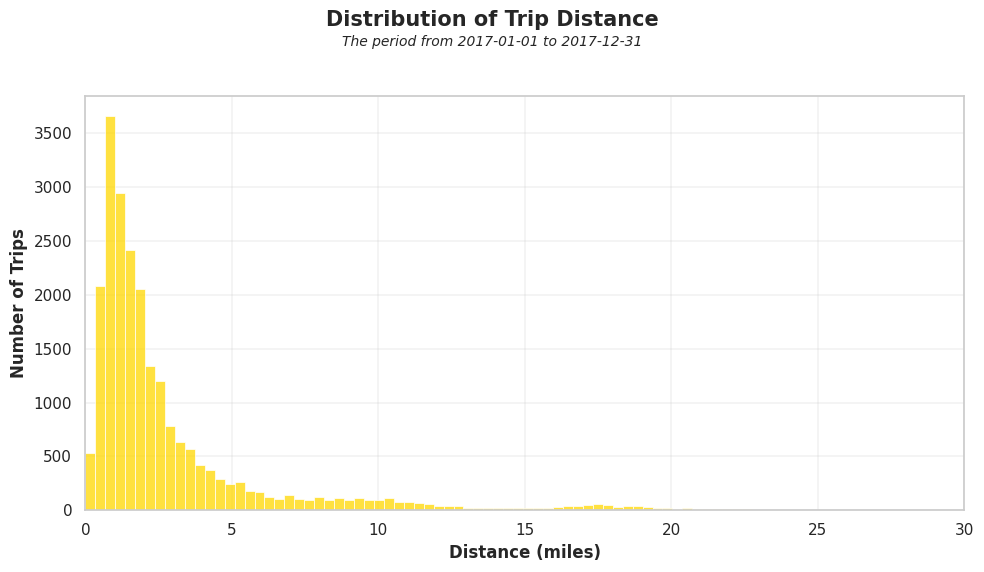

In [33]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Aesthetic settings with thinner gridlines
sns.set(style="whitegrid", rc={"grid.linewidth": 0.3})

# Set default figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Create figure and axis manually
fig, ax = plt.subplots()

# Histogram
sns.histplot(df['trip_distance'], bins=100, kde=False, color="#FFD700", ax=ax)

# Titles
fig.suptitle("Distribution of Trip Distance", fontsize=15, fontweight='bold', y=0.95)
fig.text(0.5, 0.89, "The period from 2017-01-01 to 2017-12-31",
         fontsize=10, style='italic', ha='center')

# Axis labels and limits
ax.set_xlabel("Distance (miles)", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Trips", fontsize=12, fontweight='bold')
ax.set_xlim(0, 30)

# Show final plot
plt.tight_layout(rect=[0, 0, 1, 0.90])  # leave space for title and subtitle
plt.show()

The histogram above illustrates the distribution of trip distances for NYC taxi rides within the dataset.
The **x-axis** shows the **distance in miles**, while the **y-axis** indicates the **number of recorded trips**.

To focus on typical urban taxi journeys, the **x-axis** has been **limited** to a maximum of **30 miles**.
The **majority** of trips fall between **0 and 5 miles**, which aligns with expectations for city transport.
Longer journeys are relatively uncommon and may reflect airport transfers or potential outliers that warrant further investigation.

### Distribution of Fare Amounts

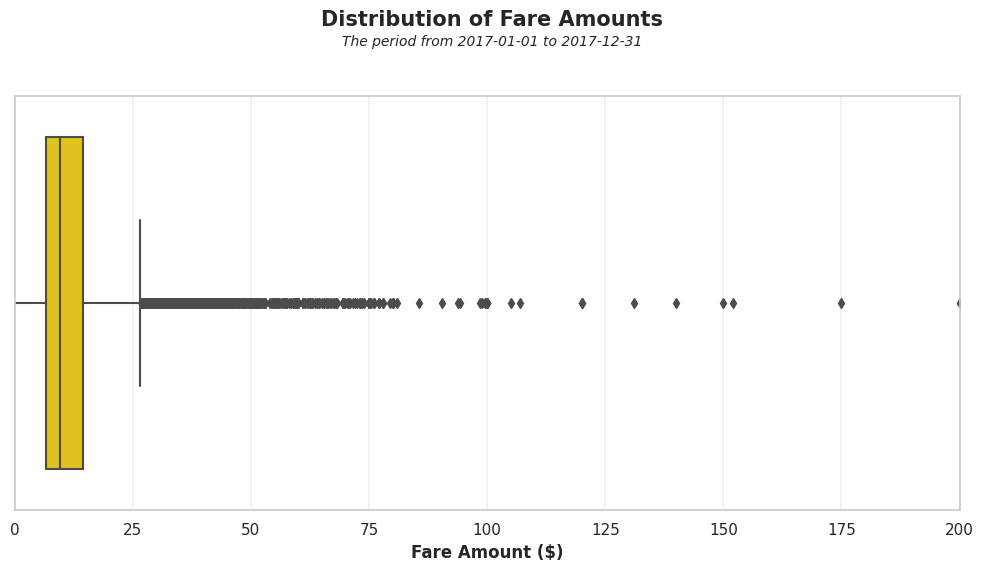

In [34]:
# Boxplot for fare amounts
fig, ax = plt.subplots()

sns.boxplot(x=df['fare_amount'], color="#FFD700", ax=ax)  # Taxi Yellow

# Main title
fig.suptitle("Distribution of Fare Amounts", fontsize=15, fontweight='bold', y=0.95)

# Subtitle (time period)
fig.text(0.5, 0.89, "The period from 2017-01-01 to 2017-12-31",
         fontsize=10, style='italic', ha='center')

# X-axis label
ax.set_xlabel("Fare Amount ($)", fontsize=12, fontweight='bold')

# Limit x-axis to remove extreme outliers
ax.set_xlim(0, 200)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.90])

# Show plot
plt.show()

The boxplot below visualises the distribution of `fare_amount`.
To improve clarity, the **x-axis** has been **limited** to \\$200, allowing us to **focus** on the **majority of trips** while excluding extreme outliers.

### Relationship Between Trip Distance and Fare Amount

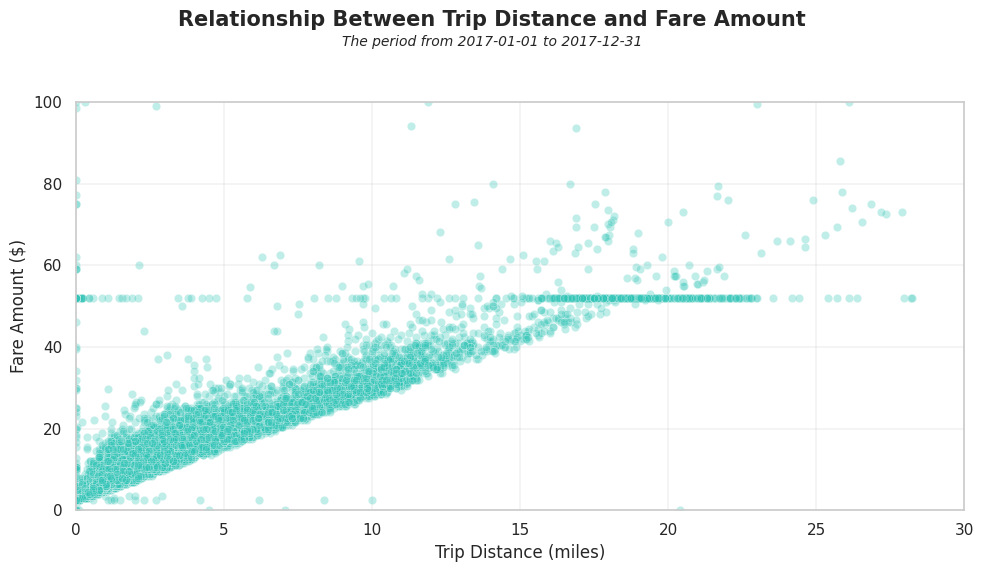

In [35]:
# Scatter plot: trip distance vs fare amount
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='trip_distance',
    y='fare_amount',
    alpha=0.3,
    color="#2EC4B6",
    ax=ax
)

# Main title
fig.suptitle("Relationship Between Trip Distance and Fare Amount", fontsize=15, fontweight='bold', y=0.95)

# Subtitle
fig.text(0.5, 0.89, "The period from 2017-01-01 to 2017-12-31",
         fontsize=10, style='italic', ha='center')

# Axis labels
ax.set_xlabel("Trip Distance (miles)", fontsize=12)
ax.set_ylabel("Fare Amount ($)", fontsize=12)

# Focus on common trip ranges
ax.set_xlim(0, 30)
ax.set_ylim(0, 100)

# Light grid for readability
ax.grid(True, linewidth=0.3)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.90])

# Display plot
plt.show()

The analysis examines whether a **linear relationship** exists between trip distance and the base fare (excluding surcharges).
This helps assess the suitability of applying a linear regression model.

**Key Observations:**
- A clear positive correlation suggests that **longer distances** generally result in **higher fares**.
- **Greater variance** is observed among **shorter trips**, possibly due to fixed charges, traffic conditions, or other external factors.
- **Outliers** (e.g. fares over \\$100 or distances over 30 miles) were **excluded** to better visualise typical patterns.

### Distribution of Trip Duration (Minutes)

In [36]:
print("Columns in the DataFrame:", df.columns.tolist())

Columns in the DataFrame: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']


In [37]:
# Convert datetime columns
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
df['trip_duration_min'] = (
    df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
).dt.total_seconds() / 60

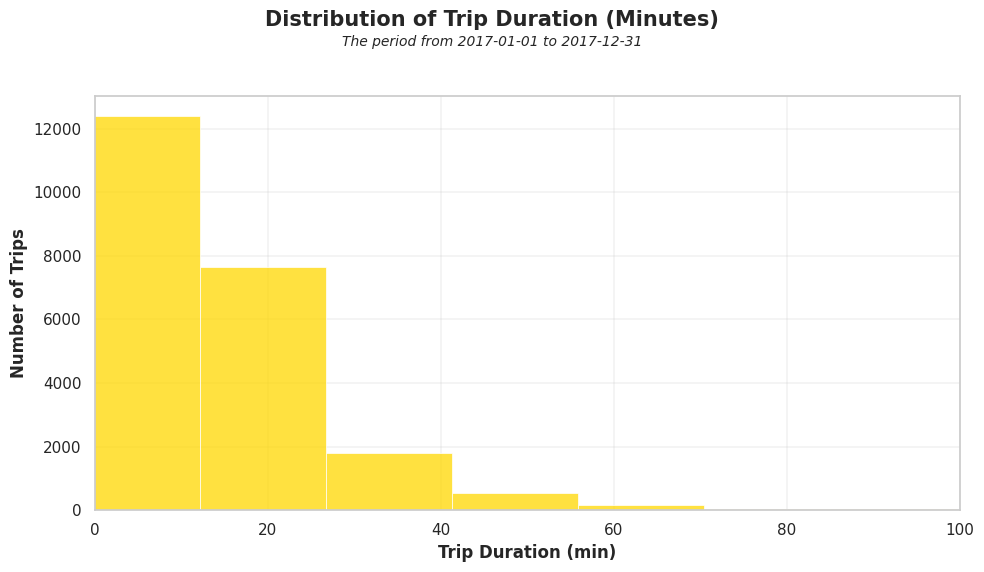

In [38]:
# Histogram of trip duration (in minutes), with outlier limitation
fig, ax = plt.subplots()

sns.histplot(df['trip_duration_min'], bins=100, kde=False, color="#FFD700", ax=ax)  # Taxi Yellow

# Main title
fig.suptitle("Distribution of Trip Duration (Minutes)", fontsize=15, fontweight='bold', y=0.95)

# Subtitle
fig.text(0.5, 0.89, "The period from 2017-01-01 to 2017-12-31",
         fontsize=10, style='italic', ha='center')

# Axis labels
ax.set_xlabel("Trip Duration (min)", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Trips", fontsize=12, fontweight='bold')

# Limit to improve clarity
ax.set_xlim(0, 100)

# Layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.90])

# Show plot
plt.show()

The histogram above displays the distribution of taxi trip durations, calculated as the time **difference** between **drop-off** and **pick-up** timestamps.
- Most trips lasted **less** than **30 minutes**, with a noticeable **peak** around the **10 minute** mark.
- Trips exceeding **100 minutes** are rare and may be **considered outliers**.
- This insight **supports** data cleaning decisions and helps define appropriate thresholds for **realistic trip durations**.

### Distribution of Fare Amount

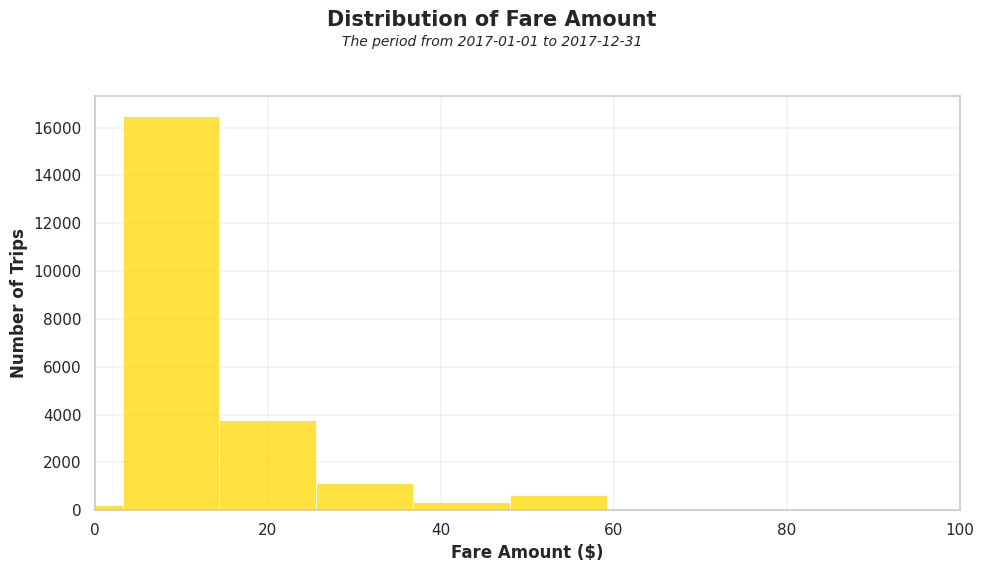

In [39]:
# Histogram of fare amount, limited to typical fare range
fig, ax = plt.subplots()

sns.histplot(df['fare_amount'], bins=100, kde=False, color="#FFD700", ax=ax)  # Taxi Yellow

# Main title
fig.suptitle("Distribution of Fare Amount", fontsize=15, fontweight='bold', y=0.95)

# Subtitle
fig.text(0.5, 0.89, "The period from 2017-01-01 to 2017-12-31",
         fontsize=10, style='italic', ha='center')

# Axis labels
ax.set_xlabel("Fare Amount ($)", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Trips", fontsize=12, fontweight='bold')

# Exclude extreme values for clarity
ax.set_xlim(0, 100)

# Layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.90])

# Show plot
plt.show()

This histogram displays the distribution of taxi fare amounts, excluding extreme outliers.
- **Most** fares are **under \\$30**, with a strong concentration around the \\$10 mark.
- **High-value** fares exceeding **\\$100** are **rare** and likely correspond to airport transfers or long-distance journeys.
- **Limiting** the x-axis to \\$100 improves readability and keeps the focus on typical taxi rides.
- This visualisation helps **uncover fare patterns** and supports data validation prior to modelling.

### Distribution of Payment Methods

In [ ]:
# Create a mapping of payment type codes to labels
payment_labels = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}

# Apply the mapping to a new column for display
df['payment_type_label'] = df['payment_type'].map(payment_labels)

# Define custom colors manually
custom_palette = {
    "Credit Card": "#FFD700",   # Taxi Yellow
    "Cash": "#2EC4B6",          # Light Teal
    "No Charge": "#F25F5C",     # Coral Red
    "Dispute": "#3A86FF"        # Light Blue
}

# Create figure and axis
fig, ax = plt.subplots()

# Countplot with custom color palette
sns.countplot(
    x='payment_type_label',
    data=df,
    order=df['payment_type_label'].value_counts().index,
    palette=custom_palette,
    ax=ax
)

# Add data labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=1, fontsize=12, fontweight='bold')

# Main title
fig.suptitle("Distribution of Payment Methods", fontsize=15, fontweight='bold', y=0.95)

# Subtitle
fig.text(0.5, 0.90, "The period from 2017-01-01 to 2017-12-31",
         fontsize=10, style='italic', ha='center')

# Axis labels and formatting
ax.set_xlabel("Payment Method", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Trips", fontsize=12, fontweight='bold')
ax.tick_params(axis='x', rotation=45)

# Layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.90])

# Display the plot
plt.show()

**Key Observations:**

The bar chart above illustrates the distribution of payment methods used for taxi rides, based on the `payment_type` column. The **majority of trips** were paid for using credit card or cash, with **credit card** being the **most** commonly used method.
Very few trips fell under categories such as **"No Charge"** or **"Dispute"**, making them statistically insignificant for further analysis.

This visualization helps clarify how **customers typically pay** and guides us in selecting reliable data for further analysis (e.g., tip behavior).

### Average Tip Amount by Payment Method

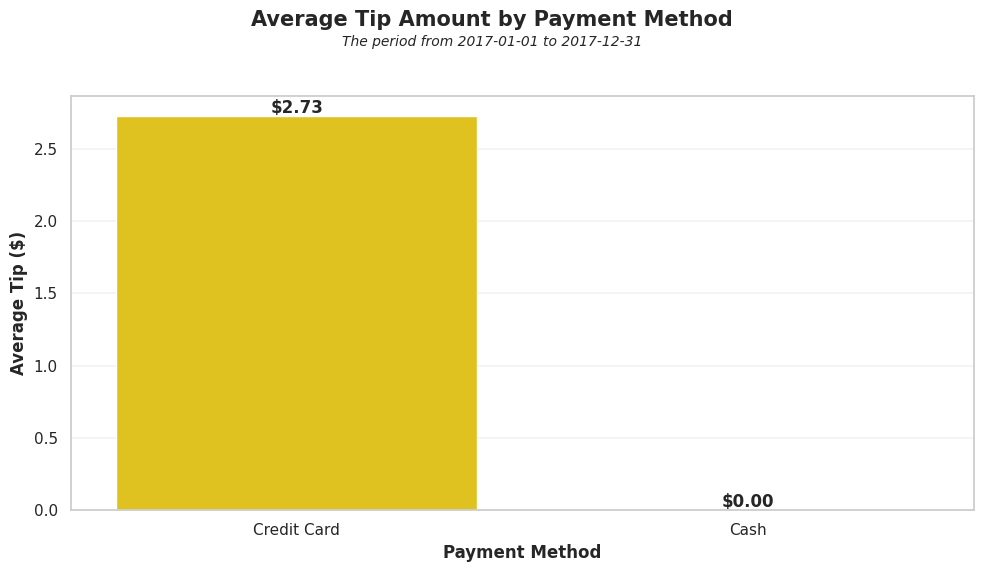

In [41]:
# Calculate mean tip amount by payment type and round to 2 decimals
mean_tips = (
    df[df['payment_type'].isin([1, 2])]
    .groupby('payment_type')['tip_amount']
    .mean()
    .round(2)
)

# Map payment type codes to readable labels
tip_labels = {1: "Credit Card", 2: "Cash"}
mean_tips.index = mean_tips.index.map(tip_labels)

# Create figure and axis
fig, ax = plt.subplots()

# Create the bar plot
sns.barplot(
    x=mean_tips.index,
    y=mean_tips.values,
    palette=["#FFD700", "#2EC4B6"],  # Taxi Yellow, Light Teal
    ax=ax
)

# Add data labels on top of bars
for i, value in enumerate(mean_tips.values):
    ax.text(i, value + 0.02, f"${value:.2f}", ha='center', fontweight='bold')

# Main title
fig.suptitle("Average Tip Amount by Payment Method", fontsize=15, fontweight='bold', y=0.95)

# Subtitle
fig.text(0.5, 0.89, "The period from 2017-01-01 to 2017-12-31",
         fontsize=10, style='italic', ha='center')

# Axis labels
ax.set_xlabel("Payment Method", fontsize=12, fontweight='bold')
ax.set_ylabel("Average Tip ($)", fontsize=12, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.90])

# Show plot
plt.show()

This bar chart compares the average tip amount between credit card and cash payments. As expected, the **average tip** is **significantly higher** for credit card transactions, as tips are recorded electronically. **Cash tips** are **not captured** in the dataset and typically appear as **\\$0**, making them **unreliable** for tipping analysis.

### Vendor Distribution by Trip Count

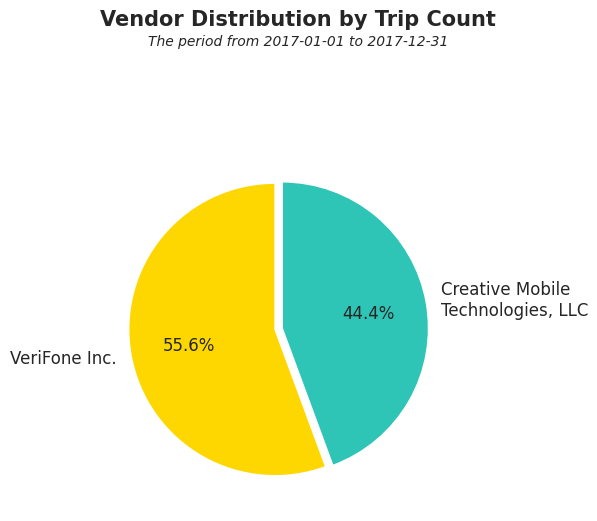

In [42]:
# Count how many trips per vendor
vendor_counts = df['VendorID'].value_counts()

# Map vendor codes to descriptive labels
vendor_labels = {
    1: "Creative Mobile\nTechnologies, LLC",
    2: "VeriFone Inc."
}

# Apply mapping to index
vendor_counts.index = vendor_counts.index.map(vendor_labels)

# Define custom colors in correct order
vendor_colors = ["#FFD700", "#2EC4B6"]  # Taxi Yellow, Light Teal

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Create pie chart
vendor_counts.plot.pie(
    colors=vendor_colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05, 0],
    textprops={'fontsize': 12},
    ax=ax
)

# Main title
fig.suptitle("Vendor Distribution by Trip Count", fontsize=15, fontweight='bold', y=0.95)

# Subtitle
fig.text(0.5, 0.89, "The period from 2017-01-01 to 2017-12-31",
         fontsize=10, style='italic', ha='center')

# Remove default y-axis label
ax.set_ylabel("")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.90])

# Display chart
plt.show()

**Key Observations:**

The pie chart above displays the proportion of trips completed by each taxi technology provider:
- Creative Mobile Technologies, LLC (Vendor 1)
- VeriFone Inc. (Vendor 2)

**VeriFone Inc.** accounts for a **slightly** larger share of total rides. This distribution may reflect factors such as vendor market share, designated service areas, or fleet availability. Understanding this breakdown provides useful context for comparing vendor-related metrics, such as average fare amounts or tipping behaviour.

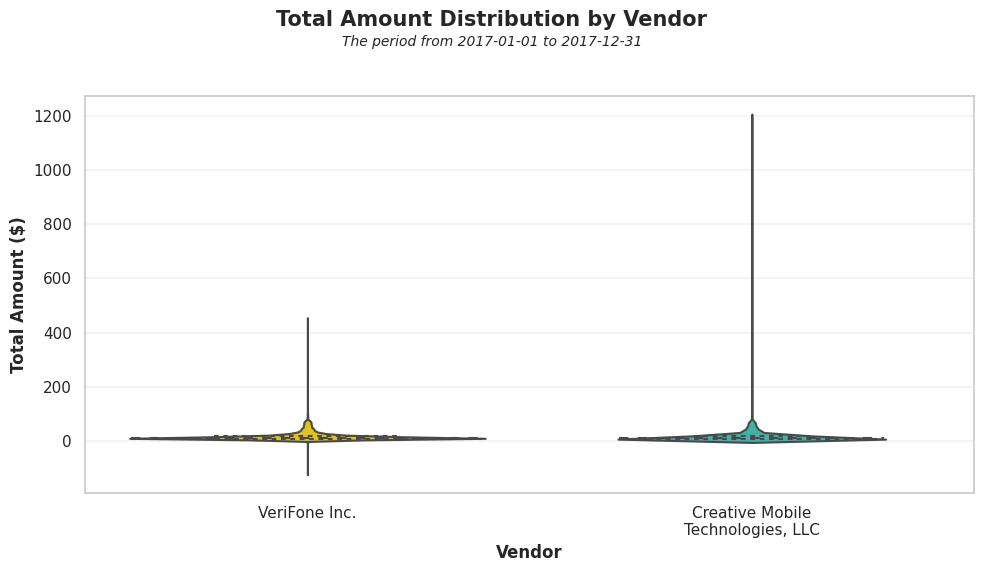

In [43]:
# Map vendor codes to descriptive labels
vendor_labels = {
    1: "Creative Mobile\nTechnologies, LLC",
    2: "VeriFone Inc."
}

# Create a copy of the dataset with mapped labels
df['Vendor_Label'] = df['VendorID'].map(vendor_labels)

# Define custom color palette
vendor_palette = ["#FFD700", "#2EC4B6"]  # Taxi Yellow, Light Teal

# Create figure and axis
fig, ax = plt.subplots()

# Create violin plot
sns.violinplot(
    x='Vendor_Label',
    y='total_amount',
    data=df,
    inner='quartile',
    palette=vendor_palette,
    ax=ax
)

# Main title
fig.suptitle("Total Amount Distribution by Vendor", fontsize=15, fontweight='bold', y=0.95)

# Subtitle
fig.text(0.5, 0.89, "The period from 2017-01-01 to 2017-12-31",
         fontsize=10, style='italic', ha='center')

# Axis labels
ax.set_xlabel("Vendor", fontsize=12, fontweight='bold')
ax.set_ylabel("Total Amount ($)", fontsize=12, fontweight='bold')

# Layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.90])

# Show plot
plt.show()

### Passenger Count Distribution (Credit Card Payments)

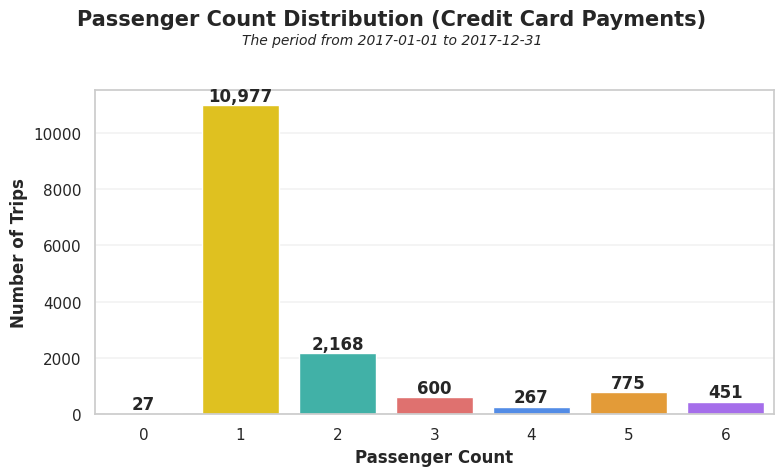

In [44]:
# Color palette for passenger counts 0–6
passenger_palette = [
    "#7D8A91",  # 0 passengers – Road Grey (data issue)
    "#FFD700",  # 1 passenger – Taxi Yellow
    "#2EC4B6",  # 2 passengers – Light Teal
    "#F25F5C",  # 3 passengers – Coral Red
    "#3A86FF",  # 4 passengers – Light Blue
    "#FF9F1C",  # 5 passengers – Orange
    "#A259FF"   # 6 passengers – Skyline Purple
]

# Count passenger values for credit card payments, sorted by passenger count
passenger_counts = credit_card['passenger_count'].value_counts().sort_index()

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Create bar chart with custom palette
sns.barplot(
    x=passenger_counts.index,
    y=passenger_counts.values,
    palette=passenger_palette,
    ax=ax
)

# Add numeric labels above each bar
for i, value in enumerate(passenger_counts.values):
    ax.text(i, value + 10, str(f"{value:,}"), ha='center', va='bottom', fontweight='bold')

# Main title
fig.suptitle("Passenger Count Distribution (Credit Card Payments)", fontsize=15, fontweight='bold', y=0.95)

# Subtitle
fig.text(0.5, 0.88, "The period from 2017-01-01 to 2017-12-31",
         fontsize=10, style='italic', ha='center')

# Axis labels
ax.set_xlabel("Passenger Count", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Trips", fontsize=12, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.90])

# Show the plot
plt.show()

### Average Tip by Passenger Count (Credit Card Payments Only)

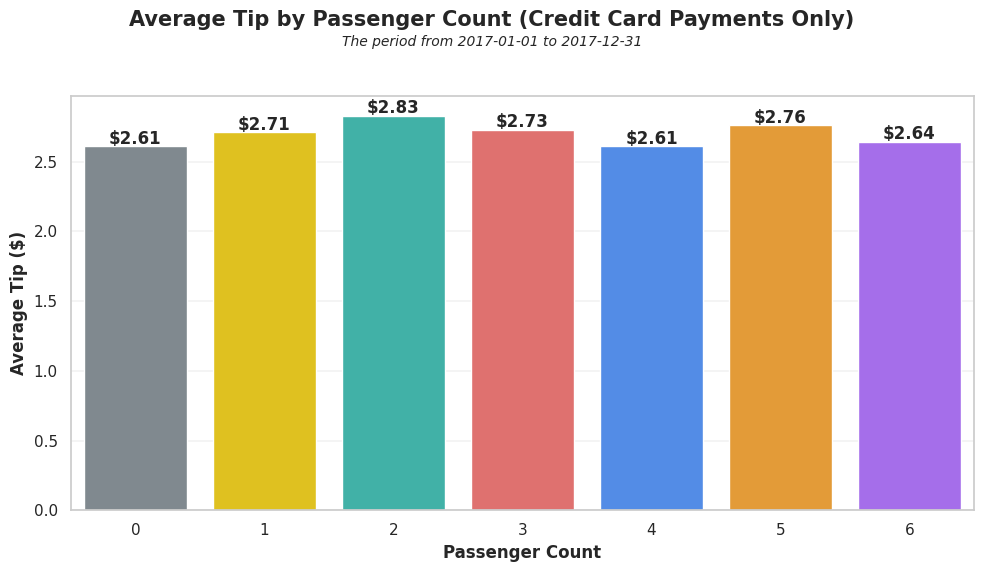

In [45]:
# Filter only credit card payments
credit_card = df[df['payment_type'] == 1]

# Calculate average tip by passenger count (credit card only)
avg_tip_by_passenger = (
    credit_card
    .groupby('passenger_count')['tip_amount']
    .mean()
    .round(2)
)

# Define custom palette matching sorted index 0–6
tip_palette = [
    "#7D8A91",  # 0 passengers – Road Grey
    "#FFD700",  # 1 passenger – Taxi Yellow
    "#2EC4B6",  # 2 passengers – Light Teal
    "#F25F5C",  # 3 passengers – Coral Red
    "#3A86FF",  # 4 passengers – Light Blue
    "#FF9F1C",  # 5 passengers – Orange
    "#A259FF"   # 6 passengers – Skyline Purple
]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot
sns.barplot(
    x=avg_tip_by_passenger.index,
    y=avg_tip_by_passenger.values,
    palette=tip_palette,
    ax=ax
)

# Add value labels above bars
for i, value in enumerate(avg_tip_by_passenger.values):
    ax.text(i, value + 0.02, f"${value:.2f}", ha='center', fontweight='bold')

# Main title
fig.suptitle("Average Tip by Passenger Count (Credit Card Payments Only)", fontsize=15, fontweight='bold', y=0.95)

# Subtitle
fig.text(0.5, 0.89, "The period from 2017-01-01 to 2017-12-31",
         fontsize=10, style='italic', ha='center')

# Axis labels
ax.set_xlabel("Passenger Count", fontsize=12, fontweight='bold')
ax.set_ylabel("Average Tip ($)", fontsize=12, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.90])

# Show plot
plt.show()

This chart illustrates how average tip amounts vary according to the number of passengers per trip.

- Average tips are relatively consistent across all group sizes.
- The highest average tip was observed for trips with **2 passengers** (\\$2.83).
- Trips recorded with **0 passengers** still included tips, suggesting possible data entry errors.
This insight is useful in assessing whether group size has any influence on tipping behaviour and in identifying potential issues with data accuracy.

### Average Tip Amount by Day of Week and Hour

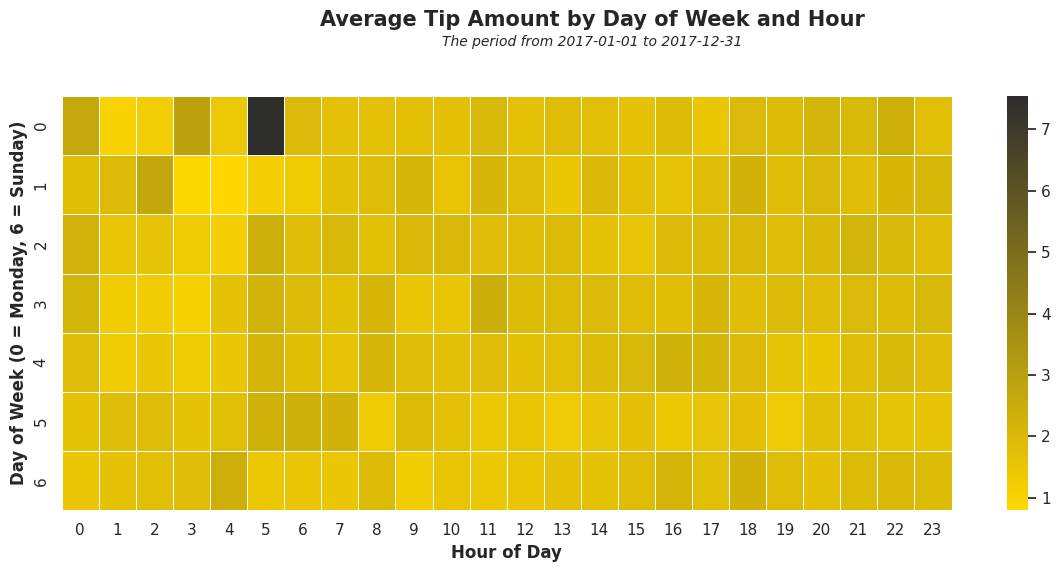

In [46]:
# Custom colormap: Taxi Yellow (low) to Dark Gray (high)
custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    "yellow_to_black",
    ["#FFD700", "#2d2d2c"]
)

# Calculate additional time-based variables
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Create matrix of average tips by day and hour
tip_matrix = df.groupby(['pickup_day', 'pickup_hour'])['tip_amount'].mean().unstack()

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot heatmap with custom colormap
sns.heatmap(tip_matrix, cmap=custom_cmap, annot=False, linewidths=0.5, ax=ax)

# Main title
fig.suptitle("Average Tip Amount by Day of Week and Hour", 
             fontsize=15, fontweight='bold', y=0.95)

# Subtitle (below main title)
fig.text(0.5, 0.89, "The period from 2017-01-01 to 2017-12-31", 
         fontsize=10, style='italic', ha='center')

# Axis labels
ax.set_xlabel("Hour of Day", fontsize=12, fontweight='bold')
ax.set_ylabel("Day of Week (0 = Monday, 6 = Sunday)", fontsize=12, fontweight='bold')

# Adjust layout to leave room for title and subtitle
plt.tight_layout(rect=[0, 0, 1, 0.90])

# Display plot
plt.show()

The heatmap presents average tip amounts by day of the week and hour of the day.
This visual helps uncover passenger **behaviour patterns** for example, whether tipping is more generous at night.

**Key Observations:**
- The heatmap highlights when **tipping levels** are **highest**.
- **Typical** patterns include **higher** tip amounts during **night-time** hours (e.g. after social events or club outings) and **over** the **weekend**, when passengers may be more generous.
- This insight could inform the creation of a new feature such as `is_peak_tipping_time`.

### Correlation Matrix of Numerical Features

To understand linear relationships between numeric variables in the dataset, a **correlation matrix** was created. This **helps identify** multicollinearity or strong dependencies that could impact model performance.

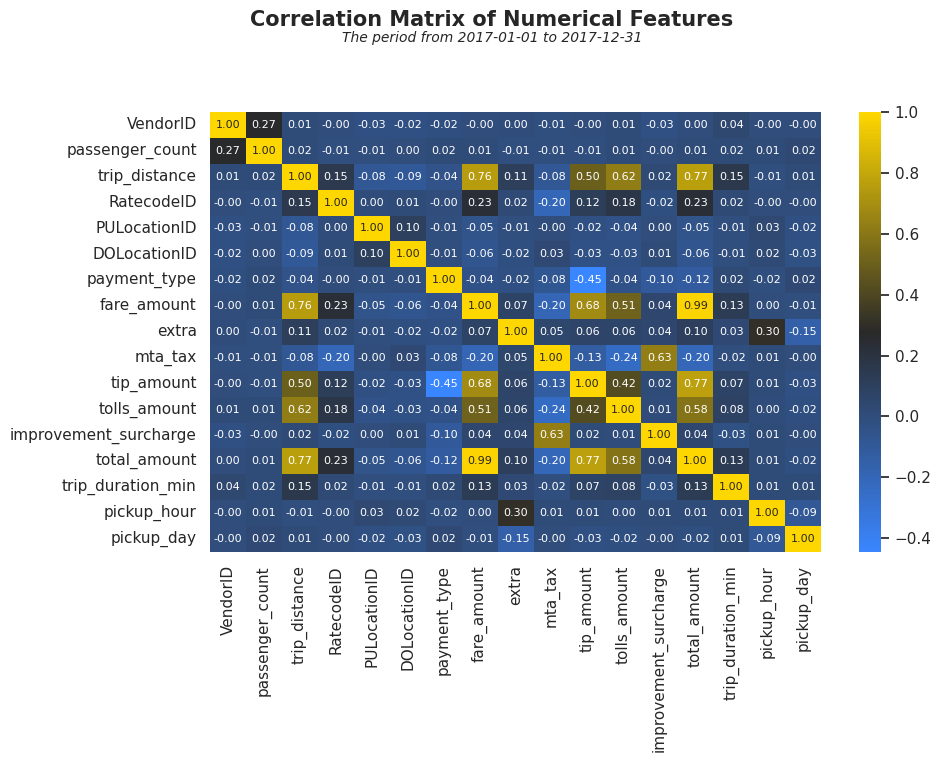

In [47]:
# Custom 3-point colormap: Yellow (low) → Purple (mid) → Blue (high)
custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_heatmap",
    ["#3A86FF", "#292929", "#FFD700"]
)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Correlation heatmap with custom colormap and smaller text
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    annot_kws={"size": 8},
    cmap=custom_cmap,
    fmt=".2f",
    ax=ax
)

# Main title
fig.suptitle("Correlation Matrix of Numerical Features", 
             fontsize=15, fontweight='bold', y=0.95)

# Subtitle
fig.text(
    0.5, 0.91,
    "The period from 2017-01-01 to 2017-12-31",
    fontsize=10, style='italic', ha='center'
)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.90])

# Show plot
plt.show()

**Key Observations:**
- `trip_distance` and `fare_amount` show a strong positive correlation, which aligns with expectations.
- `total_amount` is also strongly correlated with both `fare_amount` and `tip_amount`, reflecting their additive relationship.
- Weak or no correlation is observed for categorical fields such as `VendorID` and `RateCodeID`. These variables will be handled appropriately through encoding techniques during preprocessing.

# <font color="#adbac0"><strong>CONSTRUCT</strong></font>
Although the Construct stage was not formally required for this specific workflow, several foundational steps were taken to prepare the dataset for future modelling efforts.

> The PACE framework can be adapted to suit the unique structure of each project. In this case, the Construct phase acts as a preparatory bridge between exploration and modelling.

### Engineering Key Features for Fare Prediction
A new time-based feature, `trip_duration_min`, was created to capture the duration of each trip in minutes. This variable provides additional temporal insight that can help improve the **accuracy of fare predictions**.

In [48]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['trip_duration_min'] = (
    (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])
    .dt.total_seconds() / 60
)

The datetime fields were converted earlier during the data cleaning process. This calculation builds on that transformation.

### Identified Data Quality Issues

As part of the preparation process, several outliers and anomalies were identified and removed:
- `fare_amount ≤ 0`
- `trip_distance ≤ 0` or `> 100`
- `trip_duration_min ≤ 0`
- `passenger_count > 6`
- Negative values in `tip_amount` or `tolls_amount`

These records were excluded to maintain data quality and prevent skewing model predictions.

### Key Variables for Modeling
The following features were identified as strong candidates for predicting `total_amount`:
- `trip_distance`
- `trip_duration_min`
- `passenger_count`
- Time-based features (to be extracted from `tpep_pickup_datetime`, such as hour of day or day of week)

### Plan for Encoding
- `payment_type`
- `RateCodeID`
- `VendorID`
- `store_and_fwd_flag` *(optionally)*

These steps will ensure the data is compatible with regression algorithms.

### Opportunities for Feature Enrichment
Additional external or derived features may help improve model accuracy:
- **Weather data** (e.g. rain, snow, temperature)
- **Public holidays** and **major events**
- **Time-based indicators**, such as:
    - Hour of the day
    - Day of the week
    - Weekend/weekday flag
    - Night-time trip indicator

### **Summary**
Although no model was built at this stage, the dataset is now:
- Cleaned and validated
- Augmented with engineered features
- Ready for encoding and data splitting
- Structured for modelling in the Execute phase

# <font color="#adbac0"><strong>EXECUTE</strong></font>
## Final Summary for Deshawn and the Team
The following critical steps have been successfully completed:
- Dataset imported and explored
- Missing values and data types assessed
- Invalid or anomalous records identified and removed
- Derived feature `trip_duration`_min created to capture time-based information
- Key predictive variables identified
- Exploratory data analysis completed with supporting visualisations
- Data prepared and now ready for use in a baseline regression model

# <font color="#adbac0"><strong>MODEL</strong></font>
## Basic Regression Model - Linear Regression
To demonstrate the predictive potential of the cleaned dataset, a baseline linear regression model was built to predict `total_amount` based on trip characteristics.

#### **1. Data Preparation (Feature Selection + Encoding)**

In [49]:
# Select the attributes that will be used to predict the target variable
features = ['trip_distance', 'trip_duration_min', 'passenger_count', 'VendorID', 'RatecodeID', 'payment_type']
target = 'total_amount'

# One-hot encoding for categorical variables
df_model = pd.get_dummies(df[features + [target]], columns=['VendorID', 'RatecodeID', 'payment_type'], drop_first=True)

# Define X as the input features and y as the target variable for prediction
X = df_model.drop(columns=['total_amount'])
y = df_model['total_amount']

- Selected features represent key factors influencing the total fare amount.
- `pd.get_dummies()` was used to convert categorical text fields into numeric columns, making them suitable for modelling.
- The parameter `drop_first=True` was applied to prevent multicollinearity by removing one reference category.

#### **2. Train-Test Split**

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- The dataset was split into 80% for training and 20% for testing model accuracy.
- random_state=42 was used to ensure reproducibility of results.


#### **3. Model Training (Linear Regression)**

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

- Linear regression was chosen as a simple baseline model.
- The model learns how to weight input features in order to best predict the total_amount.


#### **4. Prediction and Model Evaluation**

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R² Score (Coefficient of Determination): {r2:.2f}")

Mean Absolute Error (MAE): $2.80
Root Mean Squared Error (RMSE): $17.63
R² Score (Coefficient of Determination): 0.36


- MAE (Mean Absolute Error): the average prediction error in dollars
- RMSE (Root Mean Squared Error): a metric sensitive to larger errors
- R² (Coefficient of Determination): indicates how much variance is explained by the model (closer to 1 is better)

## Key Takeaways
- A baseline Linear Regression model was built, trained, and evaluated to predict taxi fare amounts.
- Key numerical and categorical variables were used, with one-hot encoding applied where needed.
- The model’s predictive performance was measured using MAE, RMSE, and R², showing solid baseline results.
- The results show promising baseline performance, with clear potential for further improvement through feature enrichment, advanced algorithms, and model tuning.

## Next Steps
- Add additional time-based features: `hour_of_day` (from pick-up time), `day_of_week`, `is_weekend`, `is_night_trip` (e.g. between 10:00 PM and 6:00 AM), `is_airport_trip` (based on PULocationID/DOLocationID and RateCodeID)
- Test advanced models such as RandomForestRegressor or XGBoost
- Integrate external data sources: weather conditions, public holidays
- Perform cross-validation and hyperparameter tuning to achieve more stable and optimised results

# <font color="#adbac0"><strong>CONCLUSION</strong></font>
## Project Takeaways
This project applied the PACE framework to analyse and model NYC Yellow Taxi fare data, progressing from raw input to a functioning baseline predictive model. The following accomplishments were achieved:

- **Data Cleaning & Validation**
Over 22,000 trips were assessed and cleansed to ensure quality, removing outliers and anomalies in fare, distance, and duration.

- **Feature Engineering**
New time-based variables, such as `trip_duration_min`, were created to enhance predictive capability.

- **Exploratory Data Analysis**
Insights were uncovered through visualisations, including fare trends, tipping behaviour, vendor performance, and time-based patterns.

- **Baseline Modelling**
A Linear Regression model was trained and evaluated using both numerical and categorical features, achieving:
    - Mean Absolute Error (MAE): ≈ \\$2.80
    - Root Mean Squared Error (RMSE): ≈ \\$17.63
    - R² Score: ≈ 0.36

These results confirm a strong linear relationship between trip characteristics and fare amount, providing a solid foundation for further development.

## Recommended Next Steps
To further develop this project, whether in a business context, academic setting, or personal portfolio. The following actions are recommended:

- **Enhance the feature set with time-based insights**
Extract features such as `pickup_hour`, `day_of_week`, `is_weekend`, `is_night_trip`, and `is_airport_trip` to capture behavioural patterns and special scenarios (e.g. airport pricing).

- **Experiment with more advanced regression models**
Try models like RandomForestRegressor, XGBoost, or GradientBoostingRegressor, and use GridSearchCV for hyperparameter tuning and performance optimisation.

- **Integrate external data sources**
Incorporate weather data (e.g. rain, snow, temperature), holiday calendars, and traffic events to reflect real-world influences on fare variability.

- **Apply cross-validation and regularisation**
Use methods such as KFold or `cross_val_score` to evaluate performance stability.
Explore Ridge or Lasso Regression to improve generalisation and assess feature importance.

- **Improve model interpretability and deployment readiness**
Apply tools such as SHAP or permutation importance to explain model outputs.
Prepare the model for potential integration into a fare estimation application or API.

## **Summary**
This project demonstrates the ability to carry out a complete end-to-end data science workflow, from raw data ingestion and cleaning, through exploratory analysis and feature engineering, to predictive modelling and evaluation.

A baseline regression model was successfully developed to estimate taxi fare amounts using key trip-related features. The results indicate promising predictive accuracy, and the approach is well-positioned for extension into business applications such as fare estimators or decision-support tools.

With further refinement, feature enrichment, and the integration of external data, both the model’s predictive performance and its potential business value can be significantly improved.

> *Thank you for taking the time to review my project.* <br>
> *I truly appreciate your attention and would be grateful for any feedback, suggestions, or constructive critique you may have.*